<a href="https://colab.research.google.com/github/vghelix/cybersecurity_attack/blob/main/cybersecurity_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ml models for cybersecurity_attacks.csv and comparing the different models

In [1]:
from google.colab import files
uploaded = files.upload()

Saving cybersecurity_attacks.csv to cybersecurity_attacks.csv


## Load Data



In [2]:
import pandas as pd

df = pd.read_csv('/content/cybersecurity_attacks.csv')

print("DataFrame Head:")
print(df.head())

print("\nDataFrame Info:")
df.info()

DataFrame Head:
             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken

## Handle Missing Values



In [3]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [4]:
columns_to_fill = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
for col in columns_to_fill:
    df[col] = df[col].fillna('Unknown')

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64


## Format Timestamps



In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

print("DataFrame Info after Timestamp conversion:")
df.info()

DataFrame Info after Timestamp conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Type            40000 non-null  object        
 9   Payload Data            40000 non-null  object        
 10  Malware Indicators      40000 non-null  object        
 11  Anomaly Scores          40000 non-null  float64       
 12  Ale

## Encode Categories



In [6]:
object_columns = df.select_dtypes(include='object').columns

print("Object columns and their unique value counts:")
for col in object_columns:
    print(f"- {col}: {df[col].nunique()} unique values")

Object columns and their unique value counts:
- Source IP Address: 40000 unique values
- Destination IP Address: 40000 unique values
- Protocol: 3 unique values
- Packet Type: 2 unique values
- Traffic Type: 3 unique values
- Payload Data: 40000 unique values
- Malware Indicators: 2 unique values
- Alerts/Warnings: 2 unique values
- Attack Type: 3 unique values
- Attack Signature: 2 unique values
- Action Taken: 3 unique values
- Severity Level: 3 unique values
- User Information: 32389 unique values
- Device Information: 32104 unique values
- Network Segment: 3 unique values
- Geo-location Data: 8723 unique values
- Proxy Information: 20149 unique values
- Firewall Logs: 2 unique values
- IDS/IPS Alerts: 2 unique values
- Log Source: 2 unique values


In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Columns for One-Hot Encoding
one_hot_cols = [
    'Protocol', 'Packet Type', 'Traffic Type', 'Action Taken',
    'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts',
    'Log Source', 'Malware Indicators', 'Alerts/Warnings',
    'Attack Signature' # Adding Attack Signature as it has low cardinality and is nominal
]

# Columns for Label Encoding (ordinal or target)
label_encode_cols = ['Severity Level', 'Attack Type']

# Columns to drop (high cardinality or irrelevant for direct modeling in this context)
drop_cols = [
    'Source IP Address', 'Destination IP Address', 'Payload Data',
    'User Information', 'Device Information', 'Geo-location Data',
    'Proxy Information'
]

# Initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply OneHotEncoder to selected columns
one_hot_encoded_data = ohe.fit_transform(df[one_hot_cols])
one_hot_df = pd.DataFrame(one_hot_encoded_data, columns=ohe.get_feature_names_out(one_hot_cols))

# Concatenate with original DataFrame and drop original columns
df = pd.concat([df.drop(columns=one_hot_cols), one_hot_df], axis=1)

# Initialize LabelEncoder and apply to specified columns
le = LabelEncoder()
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col])

# Drop the high cardinality/irrelevant columns
df = df.drop(columns=drop_cols)

print("DataFrame Head after encoding:")
print(df.head())

print("\nDataFrame Info after encoding:")
df.info()

DataFrame Head after encoding:
            Timestamp  Source Port  Destination Port  Packet Length  \
0 2023-05-30 06:33:58        31225             17616            503   
1 2020-08-26 07:08:30        17245             48166           1174   
2 2022-11-13 08:23:25        16811             53600            306   
3 2023-07-02 10:38:46        20018             32534            385   
4 2023-07-16 13:11:07         6131             26646           1462   

   Anomaly Scores  Attack Type  Severity Level  Protocol_ICMP  Protocol_TCP  \
0           28.67            2               1            1.0           0.0   
1           51.50            2               1            1.0           0.0   
2           87.42            0               1            0.0           0.0   
3           15.79            2               2            0.0           0.0   
4            0.52            0               1            0.0           1.0   

   Protocol_UDP  ...  IDS/IPS Alerts_Alert Data  IDS/IPS Alerts_Unk

In [8]:
y = df['Attack Type']
X = df.drop(columns=['Timestamp', 'Attack Type'])

print("X Head:")
print(X.head())

print("\ny Head:")
print(y.head())

X Head:
   Source Port  Destination Port  Packet Length  Anomaly Scores  \
0        31225             17616            503           28.67   
1        17245             48166           1174           51.50   
2        16811             53600            306           87.42   
3        20018             32534            385           15.79   
4         6131             26646           1462            0.52   

   Severity Level  Protocol_ICMP  Protocol_TCP  Protocol_UDP  \
0               1            1.0           0.0           0.0   
1               1            1.0           0.0           0.0   
2               1            0.0           0.0           1.0   
3               2            0.0           0.0           1.0   
4               1            0.0           1.0           0.0   

   Packet Type_Control  Packet Type_Data  ...  IDS/IPS Alerts_Alert Data  \
0                  0.0               1.0  ...                        0.0   
1                  0.0               1.0  ...       

## Build and Train Model



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Initialize and train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("\nFirst 5 predictions:", y_pred[:5])

Shape of X_train: (32000, 31)
Shape of X_test: (8000, 31)
Shape of y_train: (32000,)
Shape of y_test: (8000,)

First 5 predictions: [1 2 0 1 0]


Accuracy Score: 0.3250

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.34      2636
           1       0.33      0.30      0.32      2721
           2       0.32      0.31      0.31      2643

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.32      8000
weighted avg       0.33      0.33      0.32      8000


Confusion Matrix:
 [[952 836 848]
 [990 829 902]
 [981 843 819]]


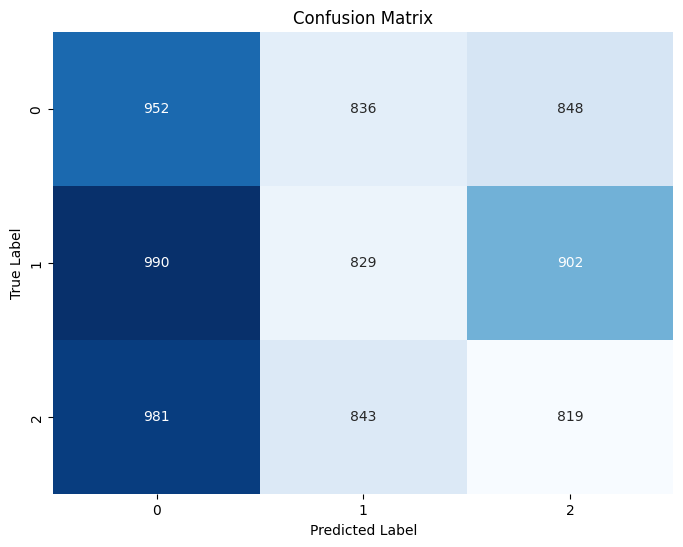

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Calculate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Split Data for New Model



In [11]:
from sklearn.model_selection import train_test_split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train_lr:", X_train_lr.shape)
print("Shape of X_test_lr:", X_test_lr.shape)
print("Shape of y_train_lr:", y_train_lr.shape)
print("Shape of y_test_lr:", y_test_lr.shape)

Shape of X_train_lr: (32000, 31)
Shape of X_test_lr: (8000, 31)
Shape of y_train_lr: (32000,)
Shape of y_test_lr: (8000,)


In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a LogisticRegression model
model_lr = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
model_lr.fit(X_train_lr, y_train_lr)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test_lr)
print("First 5 predictions from Logistic Regression:", y_pred_lr[:5])

First 5 predictions from Logistic Regression: [2 1 0 2 2]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)

# Initialize and train a LogisticRegression model with scaled data
# Increased max_iter for convergence, and added 'solver' for explicit selection
model_lr = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear')
model_lr.fit(X_train_lr_scaled, y_train_lr)

# Make predictions on the scaled test set
y_pred_lr = model_lr.predict(X_test_lr_scaled)
print("First 5 predictions from Logistic Regression (scaled data):", y_pred_lr[:5])

First 5 predictions from Logistic Regression (scaled data): [2 1 0 0 2]


Logistic Regression Accuracy Score: 0.3417

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.43      0.38      2636
           1       0.34      0.24      0.28      2721
           2       0.34      0.36      0.35      2643

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000


Logistic Regression Confusion Matrix:
 [[1124  632  880]
 [1122  661  938]
 [1034  660  949]]


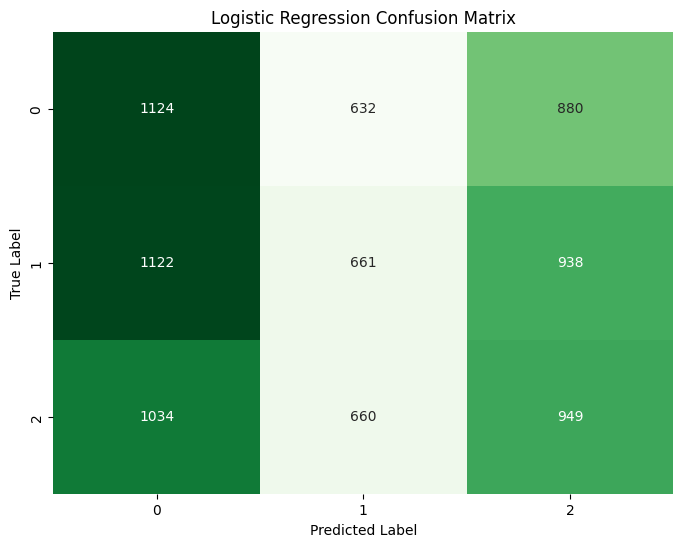

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print the accuracy score for Logistic Regression
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
print(f"Logistic Regression Accuracy Score: {accuracy_lr:.4f}")

# Calculate and print the classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_lr, y_pred_lr))

# Calculate the confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test_lr, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:\n", conf_matrix_lr)

# Create a heatmap of the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## Summary (Logistic Regression vs. Random Forest):

### Model Performance Comparison:

*   **RandomForestClassifier (Initial Model)**:
    *   **Accuracy Score**: Approximately 0.3250 (32.50%)
    *   **Insights**: The Random Forest model showed poor performance, with low precision, recall, and f1-scores across all attack types (0, 1, 2). The confusion matrix indicated significant misclassifications, suggesting the model struggled to differentiate between the attack categories.

*   **LogisticRegression (After Scaling)**:
    *   **Accuracy Score**: Approximately 0.3417 (34.17%)
    *   **Insights**: The Logistic Regression model, after feature scaling with `StandardScaler`, showed a slightly improved accuracy compared to the Random Forest model. However, its overall performance is still very low, with precision, recall, and f1-scores for individual classes also remaining poor (around 0.24 to 0.43). The confusion matrix for Logistic Regression also shows substantial misclassification across all classes. The convergence warning was resolved by scaling the data and increasing `max_iter`.



## Train Isolation Forest Model

.


##  Train Isolation Forest



In [15]:
from sklearn.ensemble import IsolationForest

# Initialize IsolationForest model
# contamination='auto' tries to estimate the proportion of anomalies in the data
iso_forest = IsolationForest(random_state=42, contamination='auto')

# Fit the model to the training data
iso_forest.fit(X_train)

print("Isolation Forest model initialized and trained.")

Isolation Forest model initialized and trained.


In [16]:
anomaly_predictions = iso_forest.predict(X_test)
anomaly_scores = iso_forest.decision_function(X_test)

print("First 5 anomaly predictions:", anomaly_predictions[:5])
print("First 5 anomaly scores:", anomaly_scores[:5])

First 5 anomaly predictions: [-1 -1 -1 -1 -1]
First 5 anomaly scores: [-0.09058039 -0.07262747 -0.08570919 -0.08111174 -0.08291466]


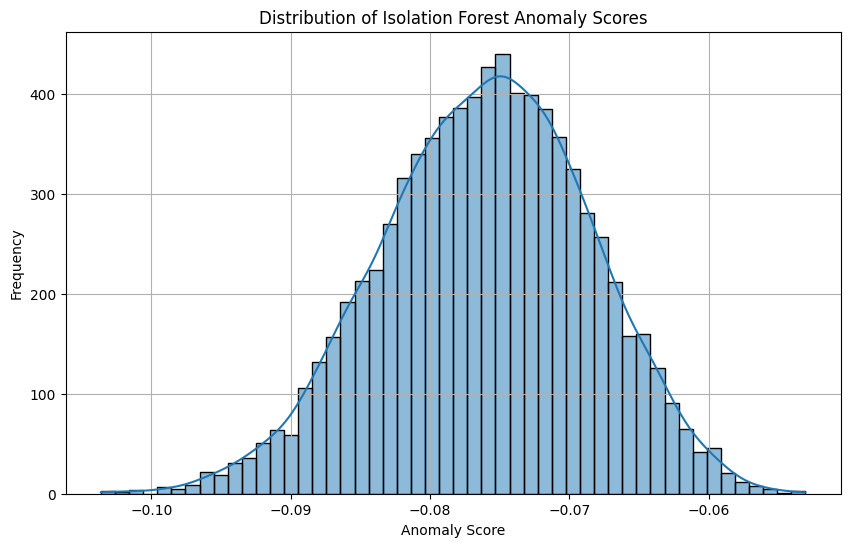

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores, bins=50, kde=True)
plt.title('Distribution of Isolation Forest Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


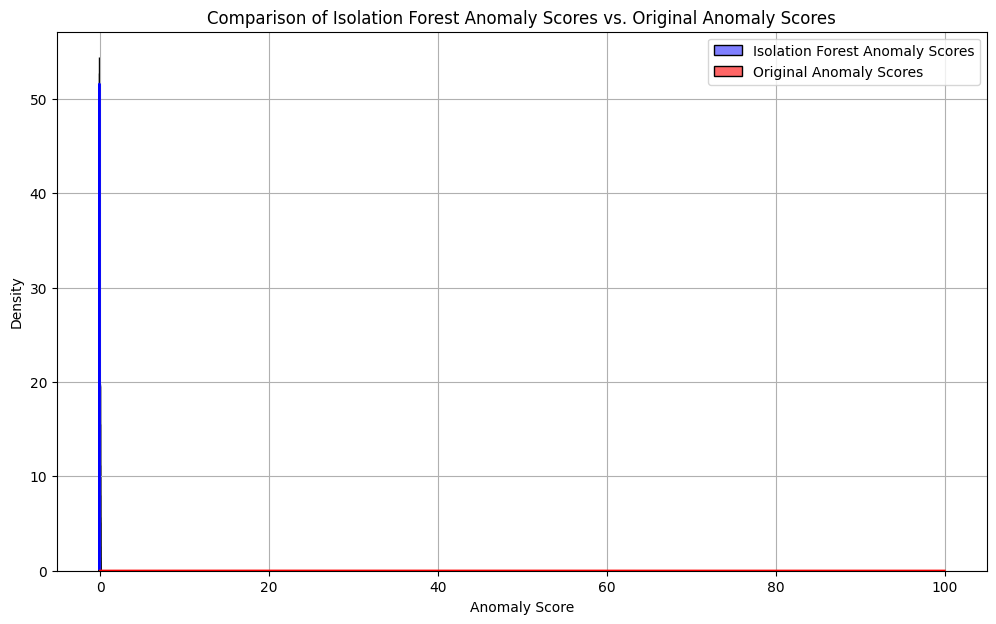

In [18]:
plt.figure(figsize=(12, 7))
sns.histplot(anomaly_scores, bins=50, kde=True, color='blue', label='Isolation Forest Anomaly Scores', stat='density')
sns.histplot(X_test['Anomaly Scores'], bins=50, kde=True, color='red', label='Original Anomaly Scores', stat='density', alpha=0.6)
plt.title('Comparison of Isolation Forest Anomaly Scores vs. Original Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
results_df = pd.DataFrame({
    'Isolation_Forest_Prediction': anomaly_predictions,
    'Isolation_Forest_Score': anomaly_scores,
    'Actual_Attack_Type': y_test
})

print("First 5 rows of the combined results DataFrame:")
print(results_df.head())


First 5 rows of the combined results DataFrame:
       Isolation_Forest_Prediction  Isolation_Forest_Score  Actual_Attack_Type
32823                           -1               -0.090580                   2
16298                           -1               -0.072627                   0
28505                           -1               -0.085709                   0
6689                            -1               -0.081112                   2
26893                           -1               -0.082915                   2


**Reasoning**:
To analyze the relationship between detected anomalies and 'Attack Type', I will visualize the distribution of Isolation Forest anomaly scores for each 'Actual_Attack_Type' using a boxplot. This will help understand if certain attack types tend to have higher or lower anomaly scores.



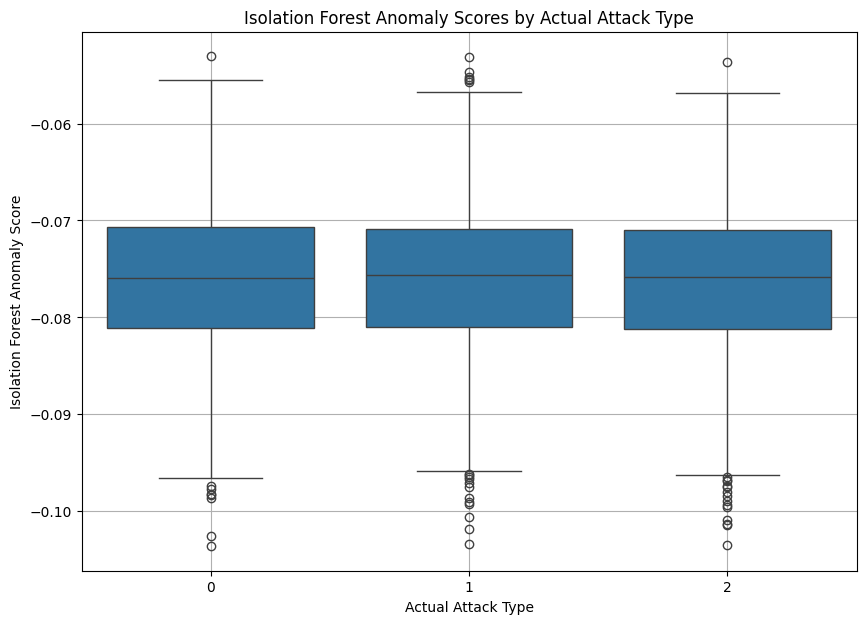

In [20]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Actual_Attack_Type', y='Isolation_Forest_Score', data=results_df)
plt.title('Isolation Forest Anomaly Scores by Actual Attack Type')
plt.xlabel('Actual Attack Type')
plt.ylabel('Isolation Forest Anomaly Score')
plt.grid(True)
plt.show()